<a href="https://colab.research.google.com/github/figoalsistn19/Tenunaraapplication/blob/machine-learning/Tenunara_6_Class_Inception%2C_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tenun Image Classification (Tenunara)

##Import Packages

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.8.2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import Xception

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

##Load Data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
try:
    os.mkdir('/content/gdrive/MyDrive/Capstone/')
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/', 'training'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/', 'testing'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Gringsing'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Palembang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Tenun Rangrang NTB'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Ulos Ragihotang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Tenun Ikat Dayak Sintang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/training', 'Tenun Sasak NTB'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Gringsing'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Palembang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Tenun Rangrang NTB'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Ulos Ragihotang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Tenun Ikat Dayak Sintang'))
    os.mkdir(os.path.join('/content/gdrive/MyDrive/Capstone/testing', 'Tenun Sasak NTB'))
except OSError:
    pass

In [ ]:
print('Gringsing:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Gringsing/')))
print('Palembang:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Palembang/')))
print('Tenun Rangrang NTB:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Tenun Rangrang NTB/')))
print('Ulos Ragihotang:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Ulos Ragihotang/')))
print('Tenun Ikat Dayak Sintang:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Tenun Ikat Dayak Sintang/')))
print('Tenun Sasak NTB:', len(os.listdir('/content/gdrive/MyDrive/Capstone/Tenun Sasak NTB/')))

Gringsing: 186
Palembang: 195
Tenun Rangrang NTB: 155
Ulos Ragihotang: 174
Tenun Ikat Dayak Sintang: 191
Tenun Sasak NTB: 216


##Preprocessing Data

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 

    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
          if index < 0.8 * file_number:
            copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
          else:
            copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file)) 

GRINGSING_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Gringsing/"
PALEMBANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Palembang/"
RANGRANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Tenun Rangrang NTB/"
RAGIHOTANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Ulos Ragihotang/"
DAYAKSINTANG_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Tenun Ikat Dayak Sintang/"
SASAK_SOURCE_DIR = "/content/gdrive/MyDrive/Capstone/Tenun Sasak NTB/"

TRAINING_GRINGSING_DIR = "/content/gdrive/MyDrive/Capstone/training/Gringsing/"
TRAINING_PALEMBANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Palembang/"
TRAINING_RANGRANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Tenun Rangrang NTB/"
TRAINING_RAGIHOTANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Ulos Ragihotang/"
TRAINING_DAYAKSINTANG_DIR = "/content/gdrive/MyDrive/Capstone/training/Tenun Ikat Dayak Sintang/"
TRAINING_SASAK_DIR = "/content/gdrive/MyDrive/Capstone/training/Tenun Sasak NTB/"

TESTING_GRINGSING_DIR = "/content/gdrive/MyDrive/Capstone/testing/Gringsing/"
TESTING_PALEMBANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Palembang/"
TESTING_RANGRANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Tenun Rangrang NTB/"
TESTING_RAGIHOTANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Ulos Ragihotang/"
TESTING_DAYAKSINTANG_DIR = "/content/gdrive/MyDrive/Capstone/testing/Tenun Ikat Dayak Sintang/"
TESTING_SASAK_DIR = "/content/gdrive/MyDrive/Capstone/testing/Tenun Sasak NTB/"

VALIDATION_GRINGSING_DIR = "/content/gdrive/MyDrive/Capstone/validation/Gringsing/"
VALIDATION_PALEMBANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Palembang/"
VALIDATION_RANGRANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Tenun Rangrang NTB/"
VALIDATION_RAGIHOTANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Ulos Ragihotang/"
VALIDATION_DAYAKSINTANG_DIR = "/content/gdrive/MyDrive/Capstone/validation/Tenun Ikat Dayak Sintang/"
VALIDATION_SASAK_DIR = "/content/gdrive/MyDrive/Capstone/validation/Tenun Sasak NTB/"


split_size = .9
split_data(GRINGSING_SOURCE_DIR, TRAINING_GRINGSING_DIR, TESTING_GRINGSING_DIR, VALIDATION_GRINGSING_DIR, split_size)
split_data(PALEMBANG_SOURCE_DIR, TRAINING_PALEMBANG_DIR, TESTING_PALEMBANG_DIR, VALIDATION_PALEMBANG_DIR, split_size)
split_data(RANGRANG_SOURCE_DIR, TRAINING_RANGRANG_DIR, TESTING_RANGRANG_DIR, VALIDATION_RANGRANG_DIR, split_size)
split_data(RAGIHOTANG_SOURCE_DIR, TRAINING_RAGIHOTANG_DIR, TESTING_RAGIHOTANG_DIR, VALIDATION_RAGIHOTANG_DIR, split_size)
split_data(DAYAKSINTANG_SOURCE_DIR, TRAINING_DAYAKSINTANG_DIR, TESTING_DAYAKSINTANG_DIR, VALIDATION_DAYAKSINTANG_DIR, split_size)
split_data(SASAK_SOURCE_DIR, TRAINING_SASAK_DIR, TESTING_SASAK_DIR, VALIDATION_SASAK_DIR, split_size)

In [ ]:
train_gringsing = os.listdir(TRAINING_GRINGSING_DIR)
train_palembang = os.listdir(TRAINING_PALEMBANG_DIR)
train_rangrang = os.listdir(TRAINING_RANGRANG_DIR)
train_ragihotang = os.listdir(TRAINING_RAGIHOTANG_DIR)
train_dayaksintang = os.listdir(TRAINING_DAYAKSINTANG_DIR)
train_sasak = os.listdir(TRAINING_SASAK_DIR)

test_gringsing = os.listdir(TESTING_GRINGSING_DIR)
test_palembang = os.listdir(TESTING_PALEMBANG_DIR)
test_rangrang = os.listdir(TESTING_RANGRANG_DIR)
test_ragihotang = os.listdir(TESTING_RAGIHOTANG_DIR)
test_dayaksintang = os.listdir(TESTING_DAYAKSINTANG_DIR)
test_sasak = os.listdir(TESTING_SASAK_DIR)

val_gringsing = os.listdir(VALIDATION_GRINGSING_DIR)
val_palembang = os.listdir(VALIDATION_PALEMBANG_DIR)
val_rangrang = os.listdir(VALIDATION_RANGRANG_DIR)
val_ragihotang = os.listdir(VALIDATION_RAGIHOTANG_DIR)
val_dayaksintang = os.listdir(VALIDATION_DAYAKSINTANG_DIR)
val_sasak = os.listdir(VALIDATION_SASAK_DIR)

print("Training")
print('gringsing :', len(train_gringsing))
print('palembang :', len(train_palembang))
print('rangrang :', len(train_rangrang))
print('ragihotang :', len(train_ragihotang))
print('dayak sintang :', len(train_dayaksintang))
print('sasak :', len(train_sasak))

print("\nTesting")
print('gringsing :', len(test_gringsing))
print('palembang :', len(test_palembang))
print('rangrang :', len(test_rangrang))
print('ragihotang :', len(test_ragihotang))
print('dayak sintang :', len(test_dayaksintang))
print('sasak :', len(test_sasak))

print("\nValidation")
print('gringsing :', len(val_gringsing))
print('palembang :', len(val_palembang))
print('rangrang :', len(val_rangrang))
print('ragihotang :', len(val_ragihotang))
print('dayak sintang :', len(val_dayaksintang))
print('sasak :', len(val_sasak))

Training
gringsing : 149
palembang : 156
rangrang : 124
ragihotang : 140
dayak sintang : 153
sasak : 173

Testing
gringsing : 18
palembang : 19
rangrang : 15
ragihotang : 17
dayak sintang : 19
sasak : 21

Validation
gringsing : 19
palembang : 20
rangrang : 16
ragihotang : 17
dayak sintang : 19
sasak : 22


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (300, 300)

TRAINING_DIR = '/content/gdrive/MyDrive/Capstone/training/'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/gdrive/MyDrive/Capstone/testing/'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)

VALIDATION_DIR = '/content/gdrive/MyDrive/Capstone/validation/'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)

Found 895 images belonging to 6 classes.
Found 109 images belonging to 6 classes.
Found 113 images belonging to 6 classes.


In [ ]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 895 files belonging to 6 classes.


In [ ]:
class_names = train_dataset.class_names

print(class_names)

['Gringsing', 'Palembang', 'Tenun Ikat Dayak Sintang', 'Tenun Rangrang NTB', 'Tenun Sasak NTB', 'Ulos Ragihotang']


##Model Achitecture

###Xception

In [ ]:
base_model = Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(300, 300, 3),
    include_top=False,
  )

base_model.trainable = False
# for layer in base_model.layers:
#   layer.trainable = False

base_model.summary()

83697664/83683744 [==============================] - 7s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
inputs = tf.keras.Input(shape=(300, 300, 3))

x = base_model(inputs, training=False)
x = layers.Flatten()(x)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(218, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(6, activation='softmax')(x)

####Compile and Fit Model

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if (logs.get('val_acc') > 0.88):
      print('Akurasi mencapai 88% maka batalkan pelatihan!')
      self.model.stop_training = True

callbacks = CustomCallback()

In [ ]:
model = Model(inputs, outputs)

model.summary()

# model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 218)               44646618  
                                                                 
 dense_1 (Dense)             (None, 64)                14016     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390   

In [ ]:
history = model.fit(train_generator,
                    epochs=25,
                    validation_data=val_generator,
                    verbose = 1,
                    callbacks = callbacks)

Epoch 1/25
28/28 [==============================] - 48s 1s/step - loss: 1.2710 - acc: 0.5251 - val_loss: 0.7114 - val_acc: 0.7611
Epoch 2/25
28/28 [==============================] - 35s 1s/step - loss: 0.6163 - acc: 0.7777 - val_loss: 0.5795 - val_acc: 0.8142
Epoch 3/25
28/28 [==============================] - 34s 1s/step - loss: 0.4628 - acc: 0.8469 - val_loss: 0.4385 - val_acc: 0.8584
Epoch 4/25
28/28 [==============================] - 33s 1s/step - loss: 0.3883 - acc: 0.8659 - val_loss: 0.4014 - val_acc: 0.8850


####Accuracy and Loss Plot

In [ ]:
saved_model_path = "/content/gdrive/MyDrive/best_model.h5"

# Save model h5
model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} '/content/gdrive/MyDrive/best_model'

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)

INFO:tensorflow:Assets written to: rps_saved_model/assets


In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 300, 300, 3)
      name: serving_default_input_2:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 6)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_2': TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name='input_2')})
{'dense_2': TensorSpec(shape=(None, 6), dtype=tf.float32, name='dense_2')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
# Load TFLite model and allocate tensors.
with open(tflite_model_file, 'rb') as fid:
    tflite_model = fid.read()
    
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os 

from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb


model_file = "/content/converted_model.tflite"


""" ... """
"""Creates the metadata for an image classifier."""

# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Xception image classifier"
model_meta.description = ("Identify the most prominent object in the "
                          "image from a set of 6 categories such as "
                          "Kain Gringsing, Songket Palembang, , Tenun Ikat Dayak Sintang, Tenun Rangrang NTB, Tenun Sasak NTB, Ulos Ragihotang.")
model_meta.version = "v1"
model_meta.author = "TensorFlow"

# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.description = ("Input Description")
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats


# Creates output info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2

output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("label.txt")
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]

output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2

output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())


# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta,
    output_number_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

populator = _metadata.MetadataPopulator.with_model_file(model_file)
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["[path_to_labels].txt"])
populator.populate()

ModuleNotFoundError: ignored

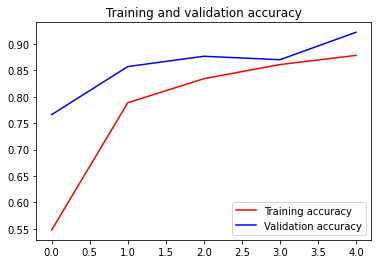

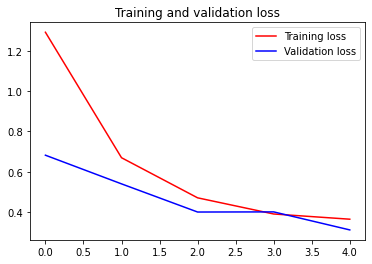

In [ ]:
#----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot  ( epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
# plt.title('Training accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation loss')
plt.title ('Training and validation loss')
# plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
uploaded = files.upload()
labels = (['Gringsing','Palembang','Tenun Ikat Dayak Sintang','Tenun Rangrang NTB','Tenun Sasak NTB','Ulos Ragihotang'])
model = tf.keras.models.load_model('/content/gdrive/MyDrive/best_model.h5')

for paths in uploaded.keys():
    # predicting images
    path = paths
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    images = np.vstack([x])
    proba = model.predict(images)[0]
    kain_tenun = {"Nama_tenun":"", "Probabilitas":0}
    
    for (label, p) in zip(labels, proba):
        print("{}: {:.2f}%".format(label, p * 100))
        if((p*100)>kain_tenun['Probabilitas']):
            kain_tenun = {"Nama_tenun": label, "Probabilitas": p*100}
    
    if(kain_tenun['Probabilitas']<=60):
        kain_tenun = {"Nama_tenun": None, "Probabilitas": 0}

Saving 20190422_233804.jpg to 20190422_233804 (3).jpg
Gringsing: 16.99%
Palembang: 2.26%
Tenun Ikat Dayak Sintang: 36.24%
Tenun Rangrang NTB: 21.50%
Tenun Sasak NTB: 20.16%
Ulos Ragihotang: 2.85%


In [ ]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))
  else:
    print('No result found !')

In [ ]:
print(train_generator.class_indices)

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  predict=np.argmax(classes, axis=1)
  plt.imshow(img)
  plt.show()

  print(fn)
  if classes[0][0] >= 0.6:
      print('Kain Gringsing')
  elif classes[0][1] >= 0.6:
      print('Songket Palembang')
  elif classes[0][2] >= 0.6:
      print('Tenun Ikat Dayak Sintang')
  elif classes[0][3] >= 0.6:
      print('Tenun Rangrang')
  elif classes[0][4] >= 0.6:
      print('Songket Sasak')
  elif classes[0][5] >= 0.6:
      print('Ulos Ragihotang')
  else:
    print('No result found !')